#### Random Forest Classifier
- Design an expeliment to investigate the impact of varying the number of trees in a RandomForest classifier on its performance for a given dataset.
- Write Python code to implement the Random Forest algolithm with different numbers of trees.
- evaluate its classification performance using appromiate evaluation metlics.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./dataset/advertising.csv")
df.sample(4)

,ID,TV,Radio,Newspaper,Sales
67,68,139.3,14.5,10.2,13.4
107,108,90.4,0.3,23.2,8.7
153,154,171.3,39.7,37.7,19.0
184,185,253.8,21.3,30.0,17.6


In [4]:
df.dropna(inplace = True)
df.drop_duplicates(keep = 'first', inplace = True)

In [5]:
median_sales = df['Sales'].median()

In [6]:
df['Sales'] = np.where(df['Sales'] > median_sales, 1, 0)

In [8]:
x = df.drop(['Sales'], axis = 1)
y = df.drop(x.columns, axis = 1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.3)

In [25]:
from sklearn.ensemble import RandomForestClassifier
num_tree = [5, 10, 12, 20]

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [27]:
accuracy = []
precision = []
recall = []
f1 = []
for n in num_tree:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(x_train, np.array(y_train).ravel())

    y_pred = model.predict(x_test)

    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred))

In [28]:
import matplotlib.pyplot as plt

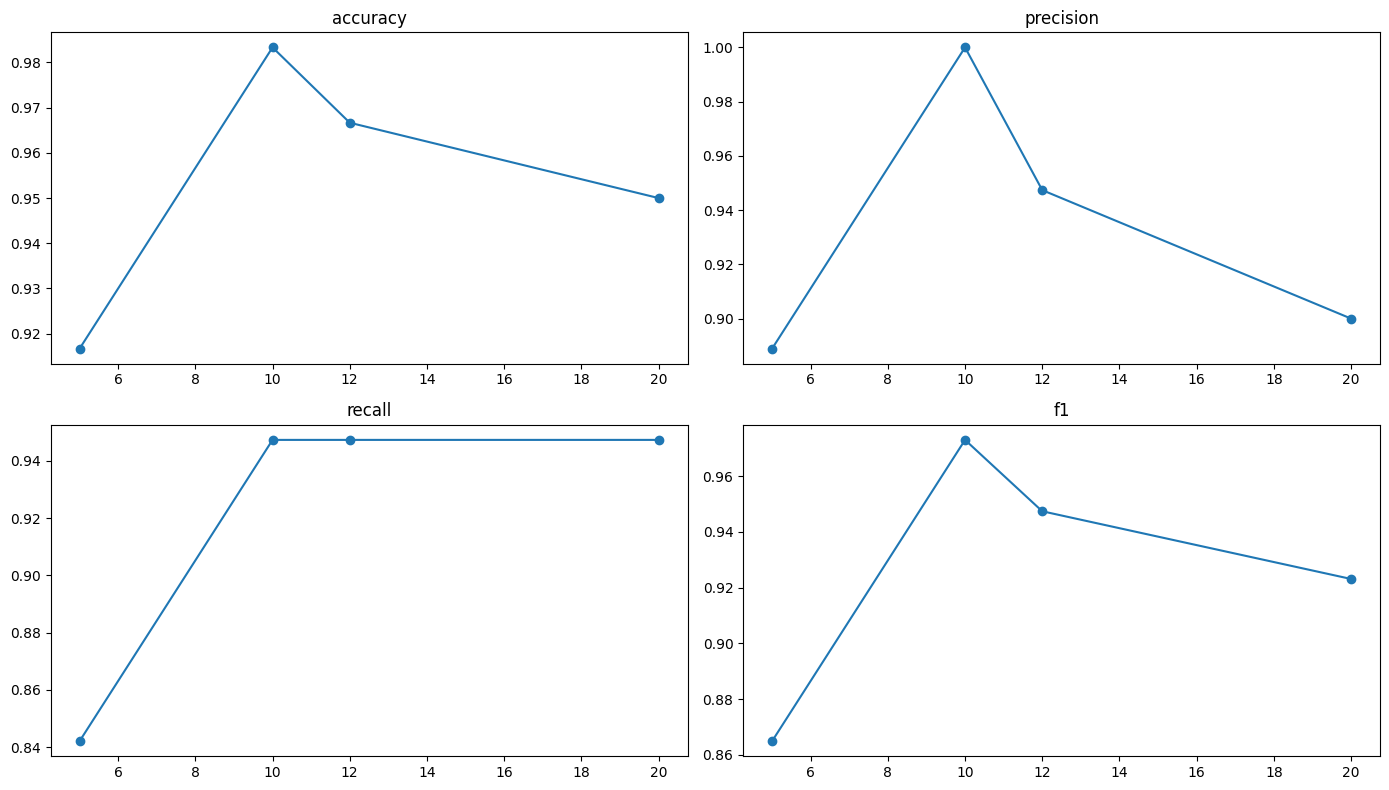

In [29]:
plt.figure(figsize = (14, 8))

plt.subplot(2, 2, 1)
plt.title('accuracy')
plt.plot(num_tree, accuracy, marker = 'o')


plt.subplot(2, 2, 2)
plt.title('precision')
plt.plot(num_tree, precision, marker = 'o')

plt.subplot(2, 2, 3)
plt.title('recall')
plt.plot(num_tree, recall, marker = 'o')

plt.subplot(2, 2, 4)
plt.title("f1")
plt.plot(num_tree, f1, marker = 'o')

plt.tight_layout()
plt.show()